# Day - 16
# Date - 11 June 2019
# Outcomes - 
>*  Understanding Machine Learning concepts - MLR

### Correlation
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.
Correlation is described as the analysis which lets us know the association or the absence of the relationship
between two variables ‘x’ and ‘y'. It is a statistical measure that represents the strength of the connection between pairs of variables.

### Difference between correlation and regression
1. In correlation, there is no difference between dependent and independent variables i.e. correlation between <b>x</b> and <b>y</b> is similar to <b>y</b> and <b>x</b>. Conversely, the regression of <b>y</b> on <b>x</b> is different from <b>x</b> on <b>y</b>.
2. Correlation indicates the strength of association between variables. As opposed to, regression reflects the impact of the unit change in the independent variable on the dependent variable.
3. Correlation aims at finding a numerical value that expresses the relationship between variables. Unlike regression whose goal is to predict values of the random variable on the basis of the values of fixed variable.
4. Correlation is used to represent the linear relationship between two variables. On the contrary, regression is used to fit the best line and estimate one variable on the basis of another variable.
5. A statistical measure which determines the co-relationship or association of two quantities is known as Correlation. Regression describes how an independent variable is numerically related to the dependent variable.

### Correlation values ranges between -1 and 1
<b>Here are two key components of a correlation value:</b>
1. <b>magnitude</b> – The larger the magnitude (closer to 1 or -1), the stronger the correlation
2. <b>sign</b> – If negative, there is an inverse correlation. If positive, there is a regular correlation.

### Positive Correlation
Numpy implements a corrcoef() function that returns a matrix of correlations of x with x, x with y, y with x and y with y. We’re interested in the values of correlation of x with y (so position (1, 0) or (0, 1)).

In [1]:
import numpy as np

np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 1000)

np.corrcoef(x, y)

#This correlation is 0.815, a strong positive correlation

array([[1.        , 0.81543901],
       [0.81543901, 1.        ]])

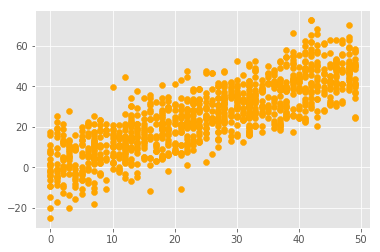

In [2]:
# scatter chart

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x, y, color = 'orange')
plt.show()

### Negative Correlation
When we invert the correlation such that an increase in x results in a decrease in y :

In [3]:
# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 5, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.94957116],
       [-0.94957116,  1.        ]])

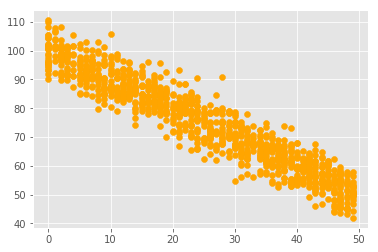

In [4]:
# scatter chart
plt.scatter(x, y, color = 'orange')
plt.show()

### No/Weak Correlation
When there is no correlation between x and y:

In [5]:
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.00554681],
       [-0.00554681,  1.        ]])

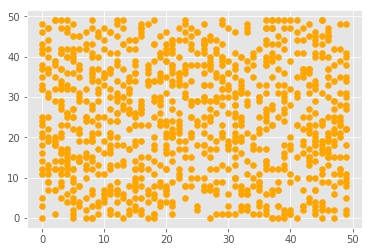

In [6]:
# scatter chart

plt.scatter(x, y, color = 'orange')
plt.show()

### Correlation Matrix
From the above results we can create a pandas Data Frame to create a matrix

In [7]:
import pandas as pd

df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})
df['b'] = df['a'] + np.random.normal(0, 10, 1000) # positively correlated with 'a'
df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000) # negatively correlated with 'a'
df['d'] = np.random.randint(0, 50, 1000) # not correlated with 'a'

df.corr()

,a,b,c,d
a,1.000000,0.825361,-0.948845,0.009802
b,0.825361,1.000000,-0.789391,0.011852
c,-0.948845,-0.789391,1.000000,-0.003228
d,0.009802,0.011852,-0.003228,1.000000


We can also view these correlations graphically as a scatter matrix:

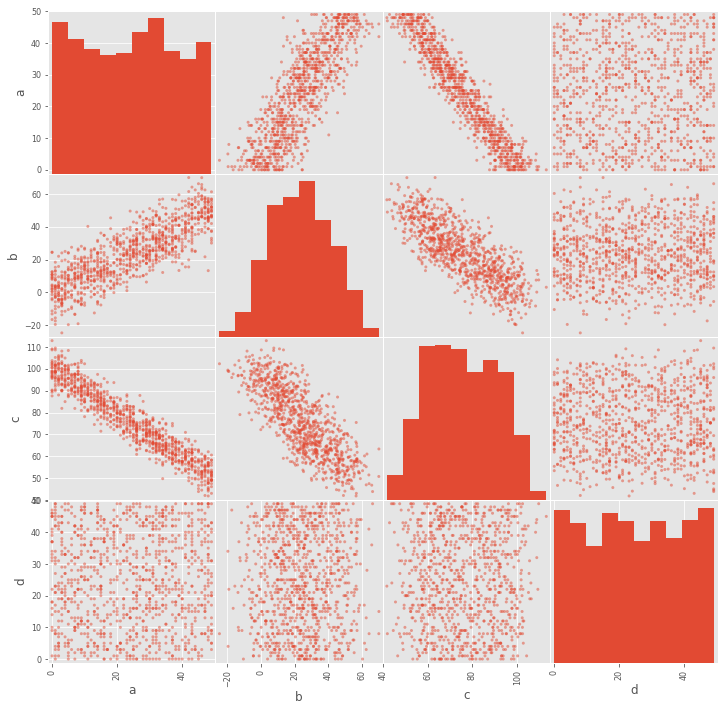

In [8]:
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()

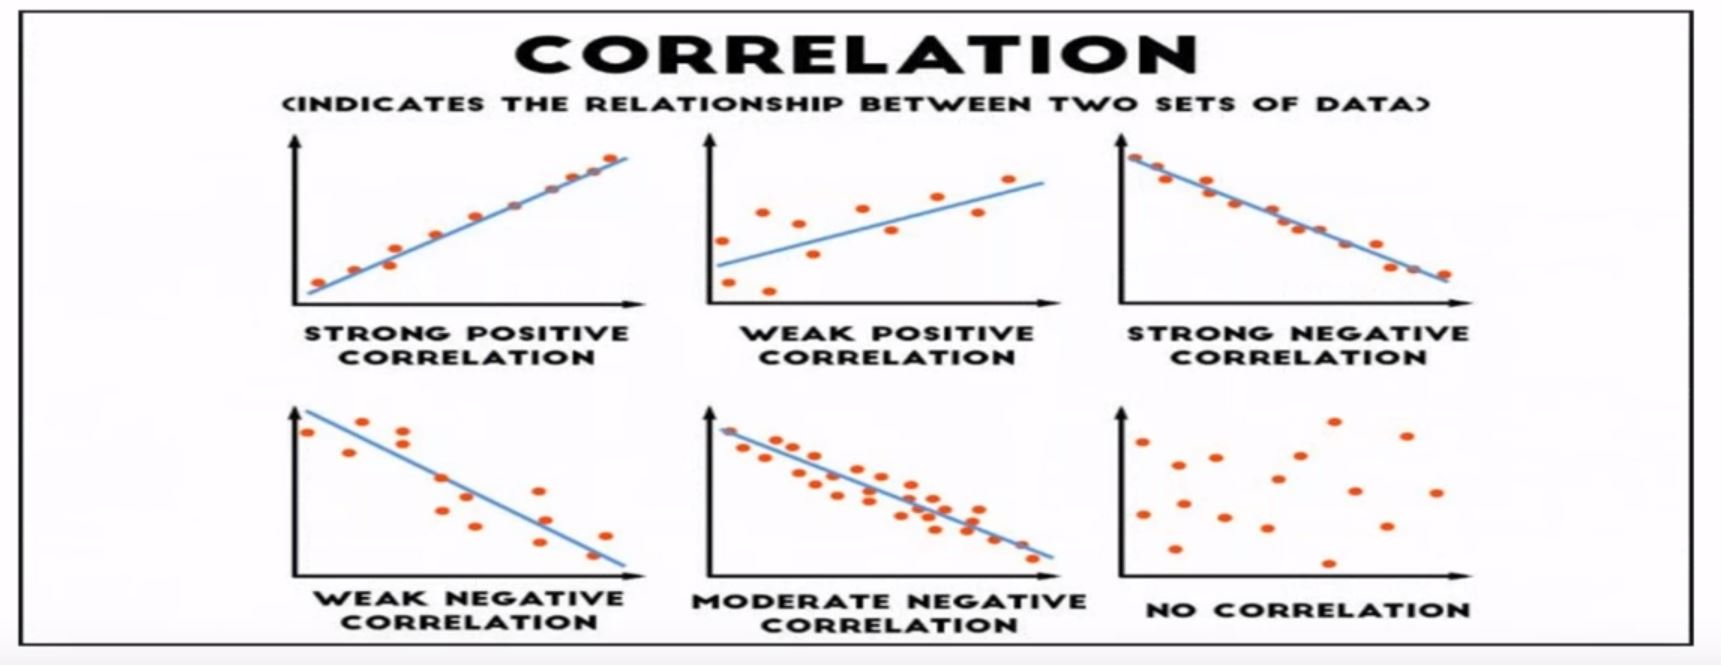

In [9]:
from IPython.display import Image
Image('correlation.png')

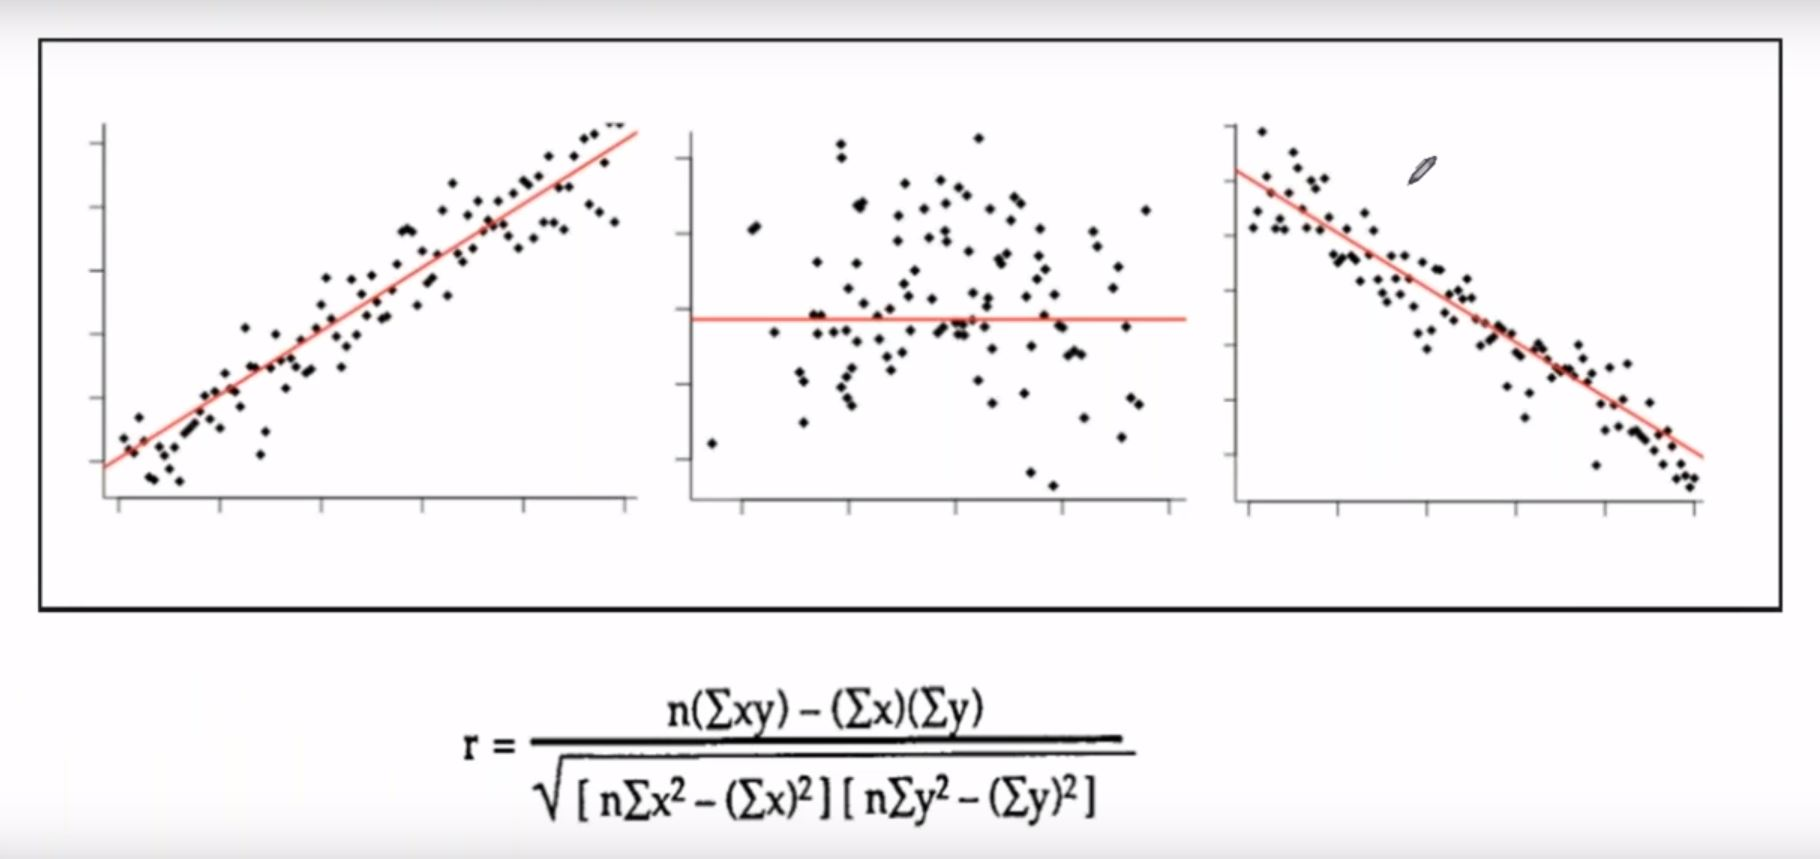

In [10]:
Image('correlation1.png')

### Assumptions of MLR 

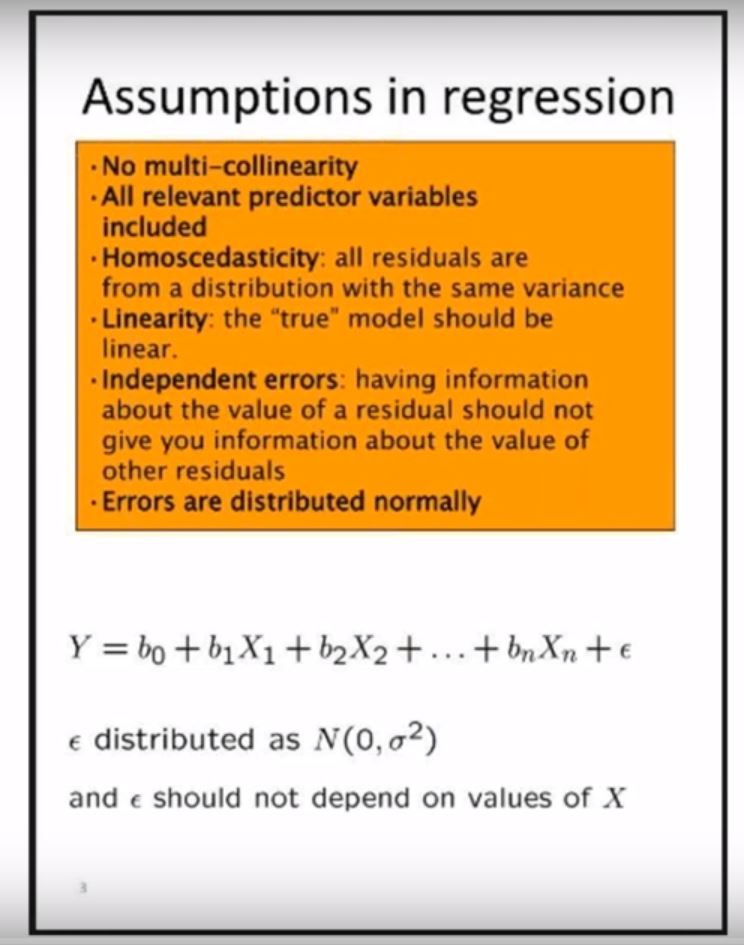

In [11]:
Image('regression.png')

1. <b>Linearity about the parameters</b>: (b0, b1, b2,.....bn should be linear).
2. <b>Errors should be independent of each other</b>:
Error = Actual Value - Predicted Value (By seeing one's error we should not be able to predict the other error).
3. <b>Normality about the errors</b>:
When we plot the errors it should be approximately a straight line.
4. <b>Input variables should be equally reliable</b>:
Input variables(X1, X2, X3,.......Xn) should be relevant.

#### Linearity - Independence - Normality - Equal variance (or homoscedasticity) : LINE

### Homoscedasticity 
* Homoscedasticity(meaning “same variance”) is central to linear regression models. Homoscedasticity describes a
situation in which the error term (i.e., the “noise” or random disturbance in the relationship between the 
independent variables and the dependent variable) is the same across all values of the independent variables.
* the variance of residuals should not increase with fitted values of response variable

In [12]:
import pandas as pd

# import the data frame
rcars = pd.read_csv('rcars.csv')

# removing unnamed column
rcars = rcars.loc[:, ~rcars.columns.str.contains('^Unnamed')]
rcars.to_csv('rcars.csv', index = False)
rcars

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [13]:
# creating a model
import statsmodels.formula.api as smf

model = smf.ols('dist ~ speed', data = rcars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           1.49e-12
Time:                        22:21:53   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

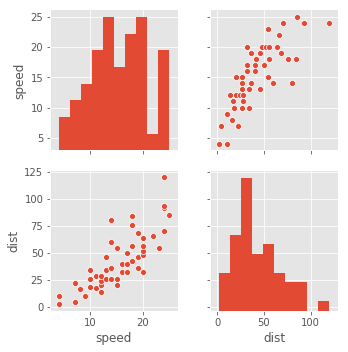

In [14]:
import matplotlib.pyplot as plt
import seaborn as seb

# plot seaborn - seb
seb.pairplot(rcars)

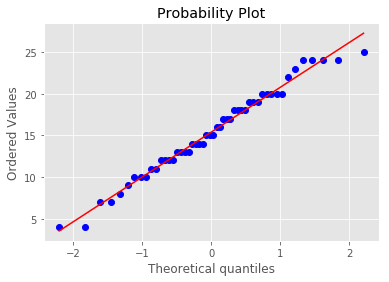

In [17]:
import pylab
import scipy
scipy.stats.probplot(rcars['speed'], dist="norm", plot=pylab)
pylab.show()

### Heteroscedasticity 
It is a problem because ordinary least squares (OLS) regression assumes that all residuals are drawn from a population that has a constant variance (homoscedasticity).

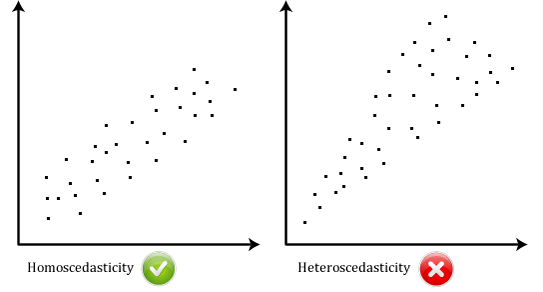

In [21]:
from IPython.display import Image
Image('homhet.png')

<b>We use family income to predict luxury spending.  As expected, there is a strong, positive association between
income and spending.  Upon examining the residuals we detect a problem – the residuals are very small for low
values of family income (almost all families with low incomes don’t spend much on luxury items) while there is 
great variation in the size of the residuals for wealthier families (some families spend a great deal on luxury
items while some are more moderate in their luxury spending).  This situation represents heteroscedasticity 
because the size of the error varies across values of the independent variable.</b>

### Multi-collinearity
* If input variables are linearly independent of each other then it is called as multi-collinearity problem.
* <b>Ex :</b> y = x1+x2
* x1 and x2 should not be linear to each other.
* There can be correlation between input and output variables. But there should be no correlation between input variables.
* If there exist correlation between input variables then it is called as multi-collinearity.